# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [67]:
Reviews_dataframe=pd.DataFrame(columns=["rating","main_comment","verification_status", "full_review", "type_of_traveller","seat_type",
                                        "route","date_flown","seat_comfort_rating","cabin_staff_service_rating","ground_service_rating",
                                        "food_and_beverages_rating","inflight_entertainment",
                                        "value_for_money_rating","recommended"])

In [69]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 386
page_size = 10

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

   # print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.select("article .list-item"):
        try:
            inflight_entertainment=food_and_beverages_rating=verificion_status=rating=seat_comfort_rating=food_and_beverages_rating=None
            main_comment=(para.find("h2",{"class":"text_header"})).get_text()
            rating=(para.find("span",{"itemprop":"ratingValue"})).get_text()
            if("Verified" in (para.find("div",{"itemprop":"reviewBody"})).get_text().split('|')[0]):
                verification_status=(para.find("strong")).get_text() 
                complete_review_text=(para.find("div",{"itemprop":"reviewBody"})).get_text().split('|')[1]
            else:
                complete_review_text=(para.find("div",{"itemprop":"reviewBody"})).get_text().split('|')[0]
            all_review_text=para.find_all("tr")
            for review in all_review_text:
                if("Type Of Traveller" in  review.get_text()):
                    type_of_traveller=review.get_text().split("Type Of Traveller")[1]
                elif("Seat Type" in  review.get_text()):
                    seat_type=review.get_text().split("Seat Type")[1]
                elif("Route" in  review.get_text()):
                    route=review.get_text().split("Route")[1]
                elif("Date Flown" in  review.get_text()):
                    date_flown=review.get_text().split("Date Flown")[1]
                elif("Recommended" in  review.get_text()):
                    recommended=review.get_text().split("Recommended")[1]
                elif("Seat Comfort" in  review.get_text()):
                    seat_comfort_rating=len(review.select(".star.fill"))
                elif("Cabin Staff Service" in  review.get_text()):
                    cabin_staff_service_rating=len(review.select(".star.fill"))
                elif("Ground Service" in  review.get_text()):
                    ground_service_rating=len(review.select(".star.fill"))
                elif("Food & Beverages" in  review.get_text()):
                    food_and_beverages_rating=len(review.select(".star.fill"))
                elif("Inflight Entertainment" in  review.get_text()):
                    inflight_entertainment=len(review.select(".star.fill"))
                elif("Value For Money" in  review.get_text()):
                    value_for_money_rating=len(review.select(".star.fill"))
            reviews.append({"rating":rating,"main_comment":main_comment,"verification_status":verification_status, "full_review":complete_review_text, 
                            "type_of_traveller":type_of_traveller,"seat_type":seat_type,"route":route, "date_flown":date_flown,
                            "seat_comfort_rating":seat_comfort_rating,"cabin_staff_service_rating":cabin_staff_service_rating,
                            "inflight_entertainment":inflight_entertainment,"food_and_beverages_rating":food_and_beverages_rating,
                            "ground_service_rating":ground_service_rating,"value_for_money_rating":value_for_money_rating,
                            "recommended":recommended})
        except:
            continue

In [70]:
Reviews_dataframe=pd.DataFrame(reviews)

In [71]:
Reviews_dataframe.shape

(3854, 15)

In [72]:
Reviews_dataframe.head()

,rating,main_comment,verification_status,full_review,type_of_traveller,seat_type,route,date_flown,seat_comfort_rating,cabin_staff_service_rating,inflight_entertainment,food_and_beverages_rating,ground_service_rating,value_for_money_rating,recommended
0,4,"""Simply not good enough""",Not Verified,BA business class in Europe has a seat the ...,Solo Leisure,Business Class,Antalya to Gatwick,October 2024,1.0,2,NaN,4.0,2,2,no
1,1,“BA refuses to reimburse us”,Trip Verified,Our flight started in Seattle Wa heading to L...,Couple Leisure,Economy Class,London to Lisbon,September 2024,3.0,2,1.0,1.0,1,2,no
2,4,"""my luggage is missing""",Trip Verified,British Airways Flight from Edinburgh got d...,Solo Leisure,Economy Class,Edinburgh to Delhi via London,September 2024,1.0,1,NaN,1.0,1,1,no
3,5,"""work is needed to provide a better customer e...",Trip Verified,British Airways World Traveller Plus (Premi...,Solo Leisure,Premium Economy,London to Vancouver,September 2024,4.0,5,1.0,2.0,3,2,yes
4,2,"""barely a step above low cost airlines""",Trip Verified,BA is barely a step above low cost airlines...,Business,Economy Class,Gatwick to Amsterdam,September 2024,3.0,4,1.0,1.0,3,1,no


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating t\hrough the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


DATA PROCESSING
text cleaning for a full review

In [73]:
import re
import nltk
from wordcloud import STOPWORDS, WordCloud
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
custom_stopwords = set(STOPWORDS) 
custom_stopwords.update(['british', 'airways', 'flight','ba','one','airline','seat','service','crew','cabin','time'])
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]  # Remove stopwords and lemmatize
    return " ".join(words)

# Apply the clean_text function to the 'full_review' column
Reviews_dataframe['cleaned_review'] = Reviews_dataframe['full_review'].apply(clean_text)
Reviews_dataframe['main_comment_review'] = Reviews_dataframe['main_comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanashreenangre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhanashreenangre/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
def assign_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating >= 4:
        return 'neutral'
    else:
        return 'negative'
Reviews_dataframe["rating"] = pd.to_numeric(Reviews_dataframe["rating"])
Reviews_dataframe['sentiment'] = Reviews_dataframe['rating'].apply(assign_sentiment)

#### Graphical representation data

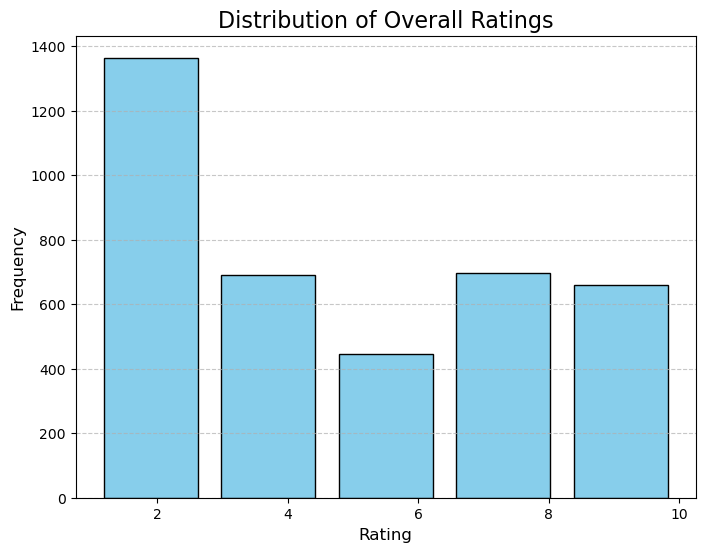

In [78]:
plt.figure(figsize=(8, 6))
Reviews_dataframe['rating'].plot(kind='hist', bins=5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

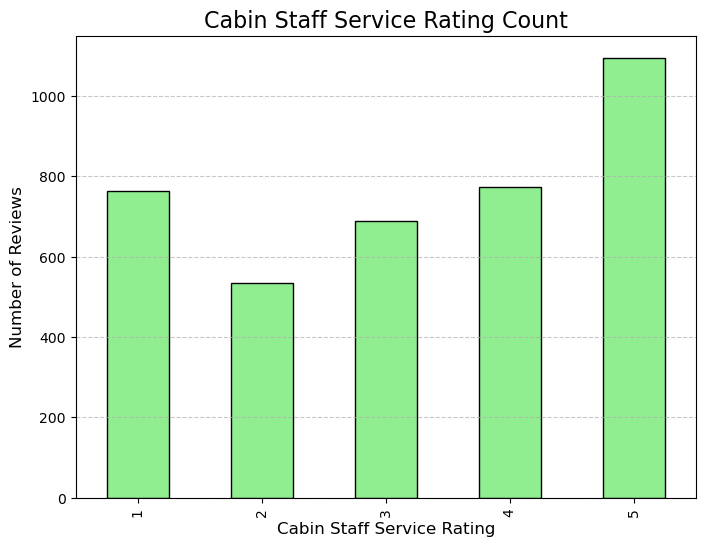

In [79]:
plt.figure(figsize=(8, 6))
Reviews_dataframe['cabin_staff_service_rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cabin Staff Service Rating Count', fontsize=16)
plt.xlabel('Cabin Staff Service Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

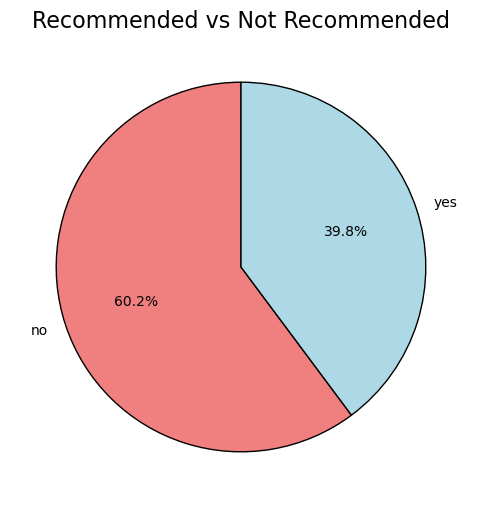

In [80]:
recommended_count = Reviews_dataframe['recommended'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(recommended_count, labels=recommended_count.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Recommended vs Not Recommended', fontsize=16)
plt.show()

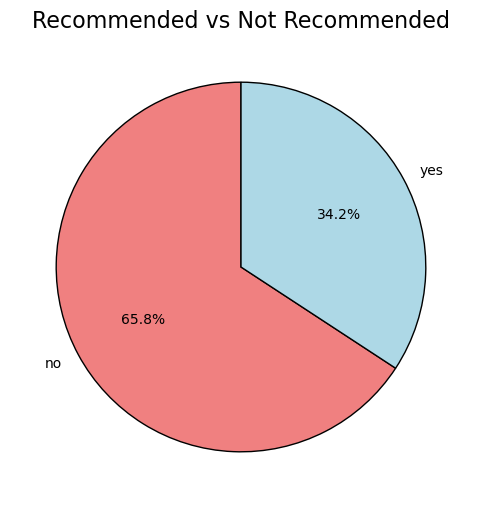

In [89]:

recommended_count = Reviews_dataframe[Reviews_dataframe['verification_status'] == 'Trip Verified']['recommended'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(recommended_count, labels=recommended_count.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Recommended vs Not Recommended', fontsize=16)
plt.show()

### Topic modelling using LDA (Latent Dirichlet Allocation (LDA))

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(Reviews_dataframe['cleaned_review'])

# Apply LDA with 3 topics
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Display topics
no_top_words = 5
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)
print("Topics found via LDA:", topics)


Topics found via LDA: [['good', 'class', 'food', 'business', 'lounge'], ['food', 'seat', 'london', 'economy', 'staff'], ['hour', 'london', 'told', 'day', 'customer']]


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(Reviews_dataframe['main_comment_review'])

# Apply LDA with 3 topics
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Display topics
no_top_words = 5
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)
print("Topics found via LDA:", topics)

Topics found via LDA: [['seat', 'worst', 'friendly', 'staff', 'cost'], ['experience', 'good', 'food', 'never', 'fly'], ['customer', 'review', 'disappointed', 'lost', 'delayed']]


In [87]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(Reviews_dataframe[Reviews_dataframe['sentiment'] == 'negative']['main_comment_review'])

# Apply LDA with 3 topics
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Display topics
no_top_words = 5
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)
print("Topics found via LDA:", topics)

Topics found via LDA: [['never', 'fly', 'class', 'business', 'poor'], ['experience', 'worst', 'food', 'seat', 'appalling'], ['customer', 'review', 'disappointed', 'terrible', 'cancelled']]


In [88]:
# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(Reviews_dataframe[Reviews_dataframe['sentiment'] == 'positive']['main_comment_review'])

# Apply LDA with 3 topics
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Display topics
no_top_words = 5
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)
print("Topics found via LDA:", topics)

Topics found via LDA: [['customer', 'review', 'excellent', 'enjoyable', 'seat'], ['good', 'friendly', 'staff', 'great', 'efficient'], ['experience', 'good', 'flight', 'food', 'recommend']]


### Sentimental Analysis

/Users/dhanashreenangre/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dhanashreenangre/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


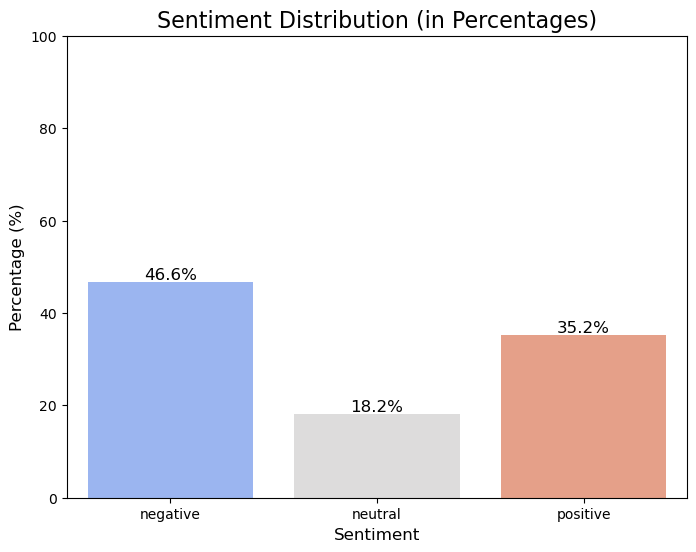

In [101]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage for each sentiment category
sentiment_percent = Reviews_dataframe['sentiment'].value_counts(normalize=True) * 100

# Convert to a DataFrame for easier plotting
sentiment_percent_df = sentiment_percent.reset_index()
sentiment_percent_df.columns = ['sentiment', 'percentage']

# Bar Plot: Sentiment Distribution in Percentages
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sentiment', y='percentage', data=sentiment_percent_df, palette='coolwarm', order=['negative', 'neutral', 'positive'])

# Add percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set titles and labels
plt.title('Sentiment Distribution (in Percentages)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentages
plt.show()

/Users/dhanashreenangre/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dhanashreenangre/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


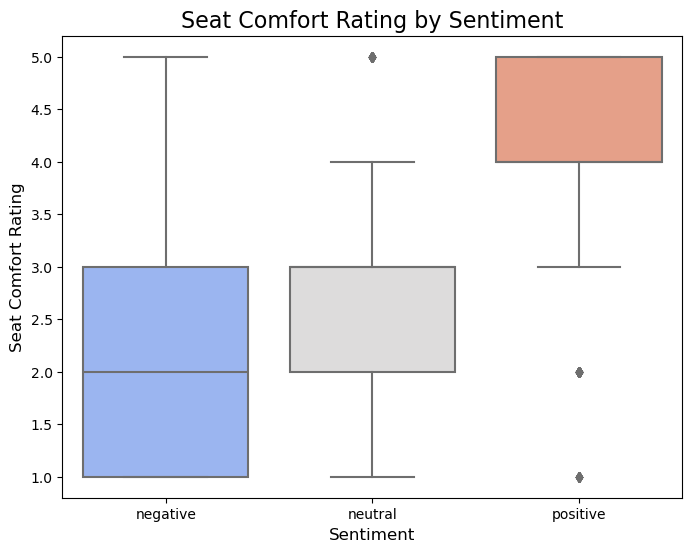

In [91]:
# Box Plot: Seat Comfort Rating by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='seat_comfort_rating', data=Reviews_dataframe, palette='coolwarm', order=['negative', 'neutral', 'positive'])
plt.title('Seat Comfort Rating by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Seat Comfort Rating', fontsize=12)
plt.show()

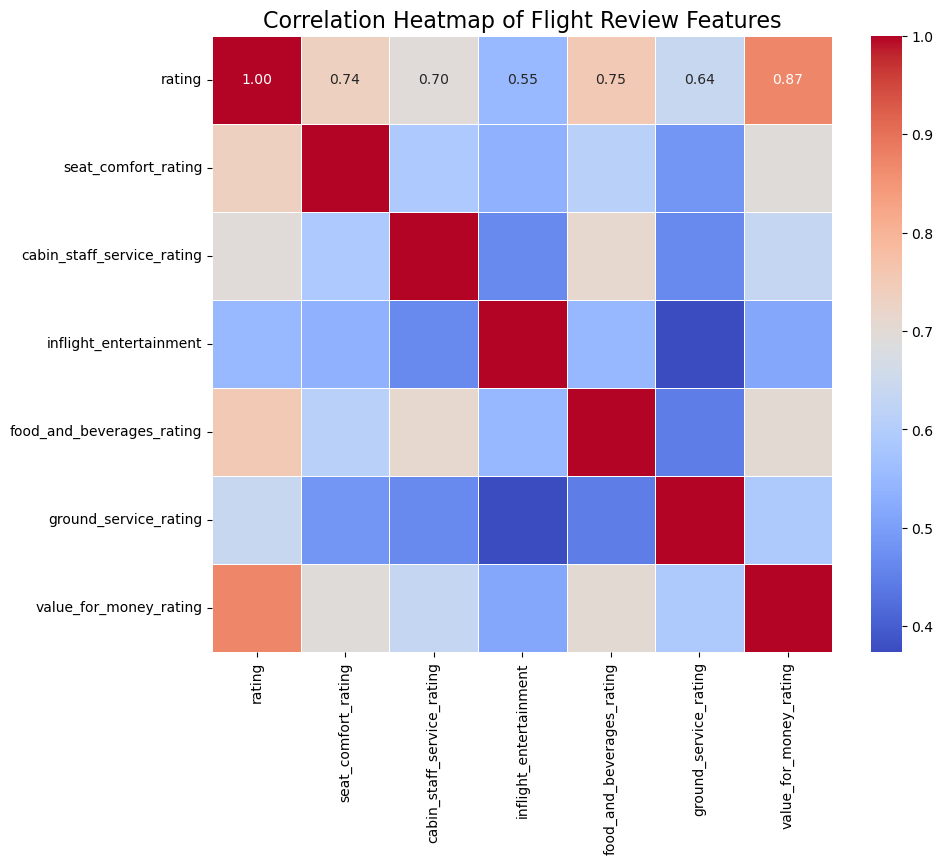

In [94]:
# Correlation Heatmap
numerical_columns = ['rating', 'seat_comfort_rating', 'cabin_staff_service_rating', 
                     'inflight_entertainment', 'food_and_beverages_rating', 
                     'ground_service_rating', 'value_for_money_rating']

# Create the correlation matrix
corr_matrix = Reviews_dataframe[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Flight Review Features', fontsize=16)
plt.show()

### Word Cloud

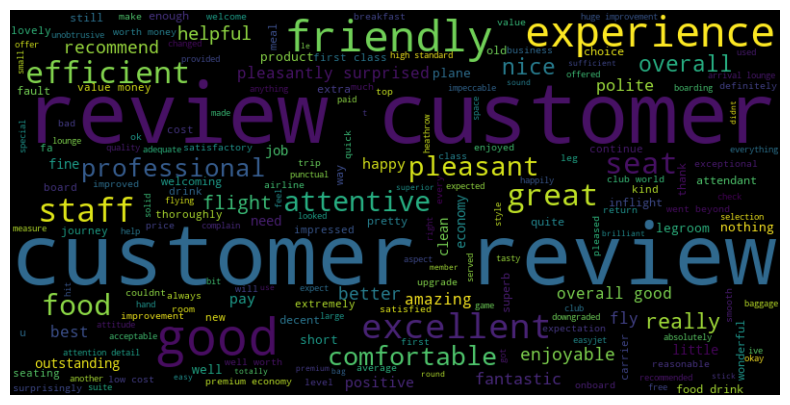

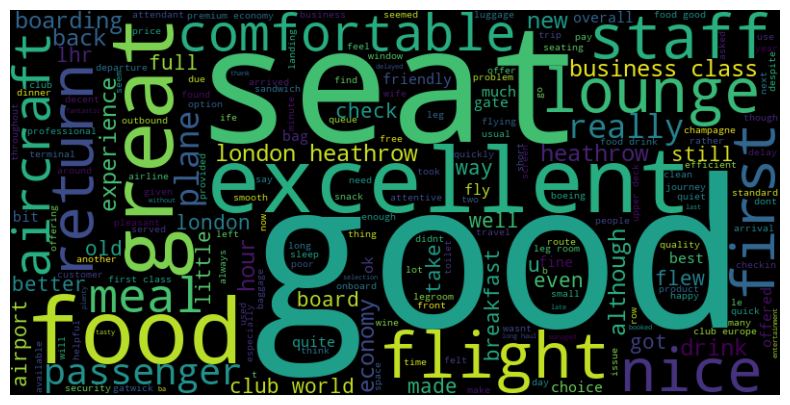

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'positive']['main_comment_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'positive']['cleaned_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


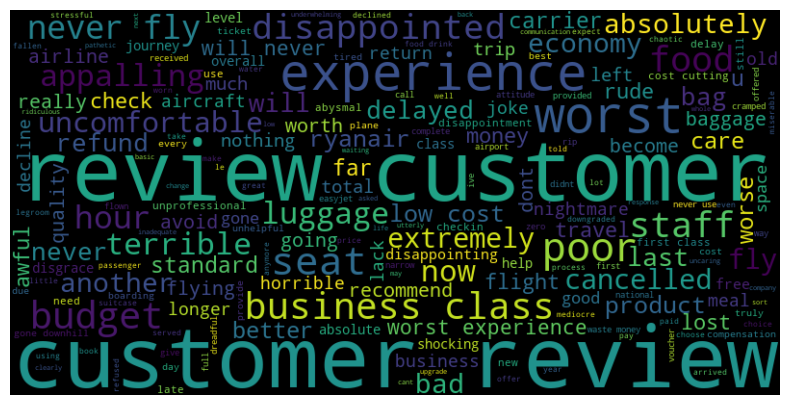

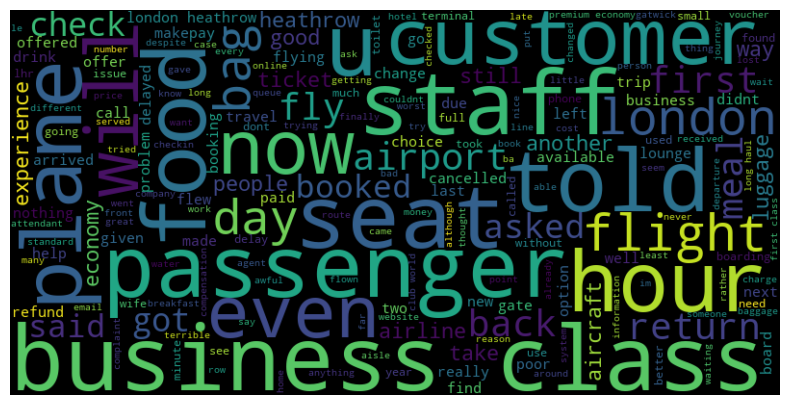

In [96]:
# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'negative']['main_comment_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'negative']['cleaned_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


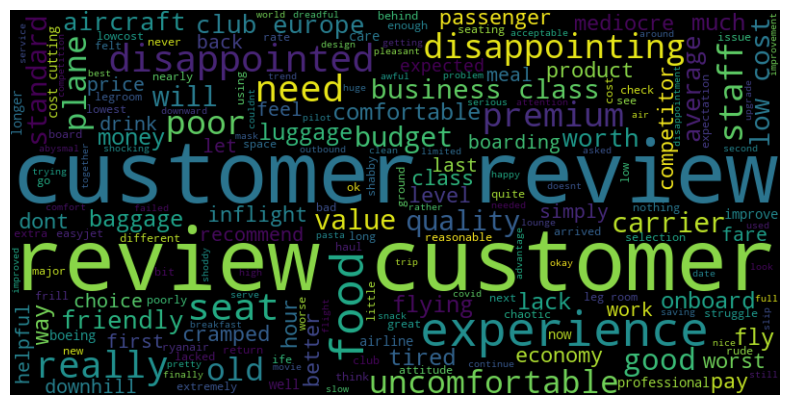

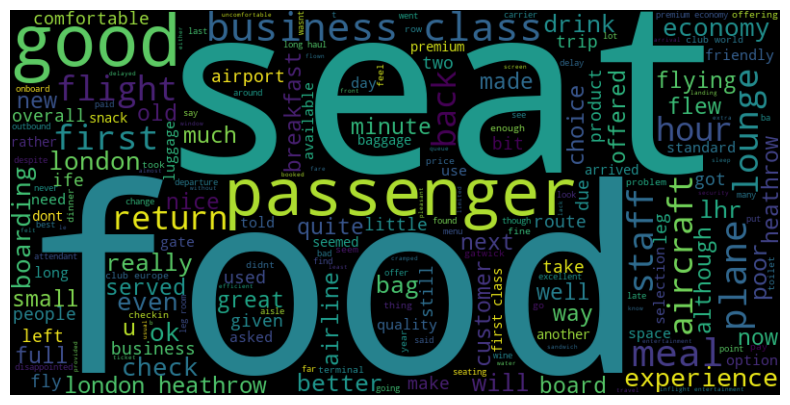

In [98]:
# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'neutral']['main_comment_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Generate word cloud for positive reviews
positive_reviews = Reviews_dataframe[Reviews_dataframe['sentiment'] == 'neutral']['cleaned_review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
